In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier, GradientBoostingClassifier,HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [187]:
titanic_df = pd.read_csv("train.csv")

In [188]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [189]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [190]:
titanic_df.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [191]:
titanic_df.shape

(891, 12)

In [192]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [193]:
titanic_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [194]:
women = titanic_df.loc[titanic_df.Sex=="female"]["Survived"]
rate_women = sum(women) / len(women)
rate_women

0.7420382165605095

In [195]:
men = titanic_df.loc[titanic_df.Sex=="male"]["Survived"]
rate_men = sum(men)/len(men)
rate_men

0.18890814558058924

In [196]:
women_survived = titanic_df.loc[titanic_df.Sex=="female"].groupby("Survived").count()["PassengerId"]
px.pie(names=["Women Didn't Survive","Women Survived", ], values=women_survived.values,title="Women Survived vs Women Didn't Survive")

In [197]:
men_survived = titanic_df.loc[titanic_df.Sex=="male"].groupby("Survived").count()["PassengerId"]
px.pie(names=["Men Didn't Survive","Men Survived", ], values=men_survived.values,title="Men Survived vs Men Didn't Survive")

In [198]:

tmp_df = titanic_df[["Pclass","Survived"]]
tmp_df

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [199]:
class_3 = tmp_df.loc[tmp_df.Pclass==3]
class_3_not_survived = class_3.Survived.value_counts()[0]
class_3_survived = class_3.Survived.value_counts()[1]
class_2 = tmp_df.loc[tmp_df.Pclass==2]
class_2_not_survived = class_2.Survived.value_counts()[0]
class_2_survived = class_2.Survived.value_counts()[1]
class_1 = tmp_df.loc[tmp_df.Pclass==1]
class_1_not_survived = class_1.Survived.value_counts()[0]
class_1_survived = class_1.Survived.value_counts()[1]

In [200]:
survival_by_class = pd.DataFrame({"Survived":[class_3_survived,class_2_survived,class_1_survived],"Not Survived":[class_3_not_survived,class_2_not_survived,class_1_not_survived]},index=["class_3","class_2","class_1"])
survival_by_class

,Survived,Not Survived
class_3,119,372
class_2,87,97
class_1,136,80


<AxesSubplot:xlabel='Pclass', ylabel='count'>

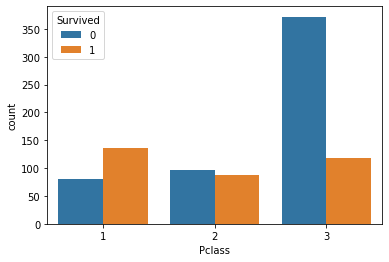

In [201]:
sns.countplot(x="Pclass",data=titanic_df,hue="Survived")

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

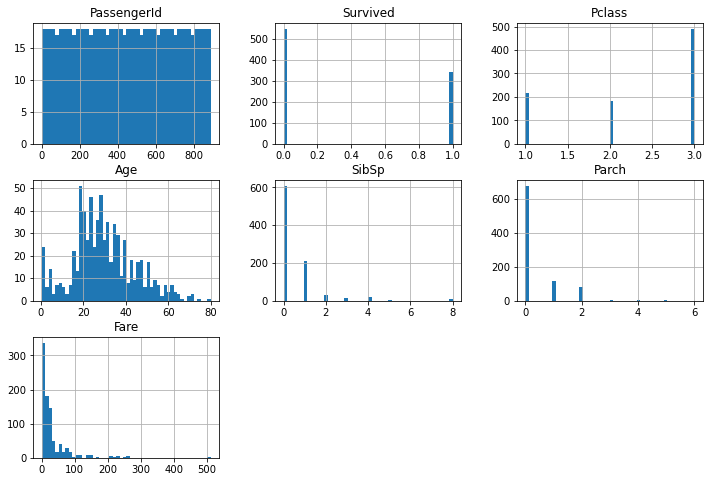

In [202]:
titanic_df.hist(bins=50,figsize=(12,8))

<AxesSubplot:xlabel='SibSp', ylabel='count'>

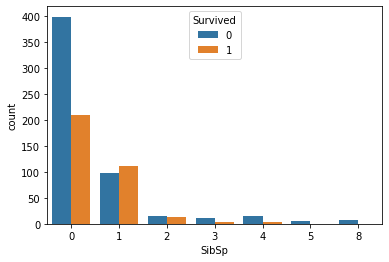

In [203]:
sns.countplot(x="SibSp",data=titanic_df,hue="Survived")

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

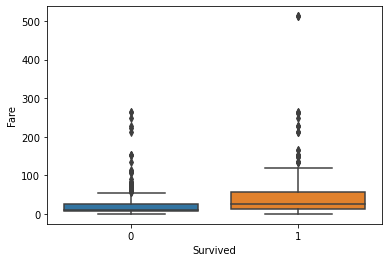

In [204]:
sns.boxplot(x="Survived", y="Fare", data=titanic_df)

array([[<AxesSubplot:title={'center':'Fare'}>]], dtype=object)

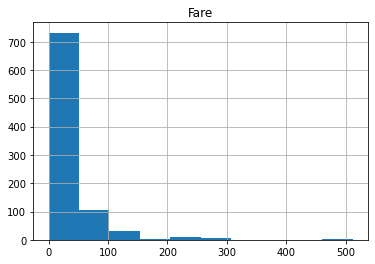

In [205]:
titanic_df.hist(column="Fare")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

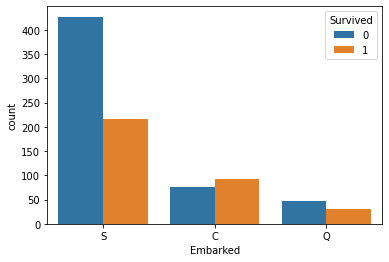

In [206]:
sns.countplot(x="Embarked",data=titanic_df,hue="Survived")

In [207]:
titanic_df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

## Feature Engineering

In [208]:
titanic_df['age_bins'] = pd.cut(x=titanic_df['Age'], bins=[0,9,19,29,39,49,59,69,79,89,99])
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(19.0, 29.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(29.0, 39.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(19.0, 29.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(29.0, 39.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(29.0, 39.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(19.0, 29.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(9.0, 19.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(19.0, 29.0]"


In [209]:
corr_matrix = titanic_df.corr()["Survived"]
corr_matrix


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

<AxesSubplot:xlabel='age_bins', ylabel='count'>

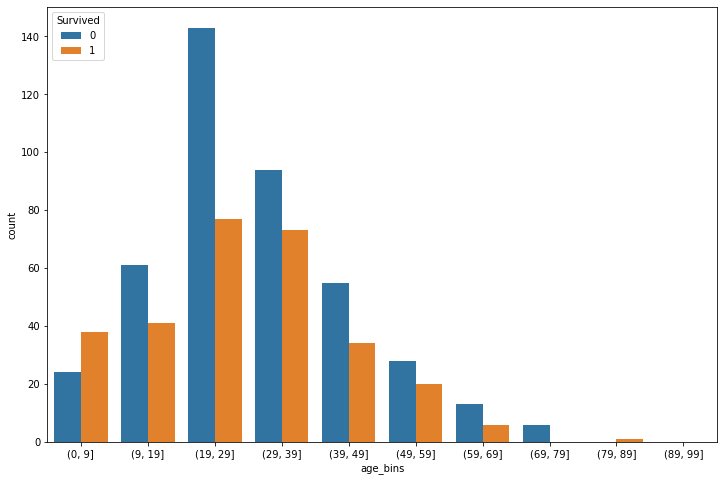

In [210]:
plt.figure(figsize=(12,8))
sns.countplot(x="age_bins",data=titanic_df,hue="Survived")

## Preprocessing

In [211]:
df_tmp = titanic_df.copy()

In [212]:
df_tmp = df_tmp.drop(columns=["Name","Ticket","age_bins","Cabin"],axis=1)

In [213]:
df_tmp.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [214]:
cat_features = ["Pclass","Sex","SibSp","Parch","Embarked"]
num_features = ["Age","Fare"]
num_pipeline = Pipeline([("num_imputer",SimpleImputer(strategy="median"))])
cat_pipeline = Pipeline([("cat_imputer",SimpleImputer(strategy="most_frequent")),
                        ("one_hot",OneHotEncoder(handle_unknown="ignore"))])

In [215]:
transformer = ColumnTransformer([("num",num_pipeline,num_features),("cat",cat_pipeline,cat_features)],remainder="passthrough")

In [216]:
X = df_tmp.drop("Survived",axis=1)
y = df_tmp.Survived
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)


In [217]:
X_train_transformed = transformer.fit_transform(X_train)
X_train_transformed.shape

(712, 25)

In [218]:
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train_transformed,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [219]:
X_val_transformed = transformer.transform(X_val)
X_val_transformed.shape

(179, 25)

In [220]:
logistic_clf.score(X_val_transformed,y_val)

0.7988826815642458

In [221]:
y_val_preds = logistic_clf.predict(X_val_transformed)
accuracy_score(y_val,y_val_preds)

0.7988826815642458

In [222]:
precision_score(y_val,y_val_preds)

0.7714285714285715

In [223]:
conf_mx = confusion_matrix(y_val,y_val_preds)

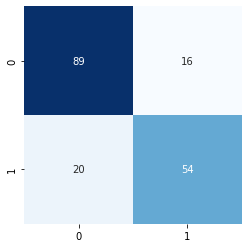

In [224]:
sns.heatmap(conf_mx, square=True, annot=True, cmap="Blues", fmt='d', cbar=False);

## Cross Validation

In [225]:
y_train_preds = cross_val_predict(logistic_clf,X_train_transformed,y_train,cv=5)
accuracy_score(y_train,y_train_preds)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814:

0.7991573033707865

## Trying another model

In [226]:
knn_clf = KNeighborsClassifier()

In [227]:
knn_clf.fit(X_train_transformed,y_train)

KNeighborsClassifier()

In [228]:
knn_clf.score(X_train_transformed,y_train)

0.7514044943820225

In [229]:
y_val_preds = knn_clf.predict(X_val_transformed)
accuracy_score(y_val,y_val_preds)

0.659217877094972

## Let's try a Ensemble Models

In [230]:
ensemble_models = [RandomForestClassifier(),ExtraTreesClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

In [231]:
for model in ensemble_models:
    model.fit(X_train_transformed,y_train)
    y_val_preds = model.predict(X_val_transformed)
    print(f"{model} : {accuracy_score(y_val,y_val_preds)}")

RandomForestClassifier() : 0.8324022346368715
ExtraTreesClassifier() : 0.8547486033519553
AdaBoostClassifier() : 0.7988826815642458
GradientBoostingClassifier() : 0.8100558659217877


In [232]:
### Let's tune the parameters of RandomForestClassifier
# params = {"n_estimators":[100,200,300,400,500],"max_features":[0.5,1.0,"auto"],"min_samples_split":[2,4,6,8],"min_samples_leaf":[1,3,5,7],"bootstrap":[True,False]}
# forest_clf  = RandomForestClassifier(random_state=42)
# gs_clf = GridSearchCV(forest_clf,params,cv=10,verbose=2,scoring="accuracy")
# gs_clf.fit(X_train_transformed,y_train)

In [233]:
# gs_clf.best_score_

In [234]:
# gs_clf.best_params_

In [235]:
grid_search_model = RandomForestClassifier(max_features=1.0, min_samples_split=8, n_estimators=400,
                       random_state=42)

In [236]:
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(891, 25)

In [237]:
grid_search_model.fit(X_transformed,y)

RandomForestClassifier(max_features=1.0, min_samples_split=8, n_estimators=400,
                       random_state=42)

In [238]:
import joblib

In [239]:
joblib.dump(grid_search_model,"gs_model.pkl")

['gs_model.pkl']

In [240]:
loaded_model = joblib.load("gs_model.pkl")

In [241]:
loaded_model

RandomForestClassifier(max_features=1.0, min_samples_split=8, n_estimators=400,
                       random_state=42)

In [242]:
test_df = pd.read_csv("test.csv")

In [243]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [244]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [245]:
test_df = test_df.drop(columns=["Name","Ticket","Cabin"],axis=1)

In [246]:
test_df.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [247]:
test_df.SibSp.value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [248]:
test_df.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [249]:
X_test_transformed = transformer.transform(test_df)

In [250]:
X_test_transformed.shape

(418, 25)

In [251]:
X_test_transformed

array([[3.45000e+01, 7.82920e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.92000e+02],
       [4.70000e+01, 7.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 8.93000e+02],
       [6.20000e+01, 9.68750e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.94000e+02],
       ...,
       [3.85000e+01, 7.25000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.30700e+03],
       [2.80000e+01, 8.05000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.30800e+03],
       [2.80000e+01, 2.23583e+01, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.30900e+03]])

In [252]:
y_pred = loaded_model.predict(X_test_transformed)

In [253]:
submission_df = pd.DataFrame()
submission_df["PassengerId"] = test_df.PassengerId
submission_df["Survived"] = y_pred

In [254]:
submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [255]:
submission_df.to_csv("Submission.csv",index=False)

In [256]:
pd.read_csv("Submission.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [257]:
df_tmp = titanic_df.copy()
df_tmp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(19.0, 29.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(29.0, 39.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(19.0, 29.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(29.0, 39.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(29.0, 39.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(19.0, 29.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(9.0, 19.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(19.0, 29.0]"


In [258]:
df_tmp["Age"].fillna(df_tmp["Age"].median(),inplace=True)

In [259]:
df_tmp['age_bins'] = pd.cut(x=df_tmp['Age'], bins=[0,9,19,29,39,49,59,69,79,89,99])
df_tmp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(19, 29]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(29, 39]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(19, 29]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(29, 39]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(29, 39]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(19, 29]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(9, 19]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,"(19, 29]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(19, 29]"


In [260]:
df_tmp.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
age_bins         0
dtype: int64

In [261]:
df_tmp.drop(columns=["Name","Ticket","Cabin"],axis=1,inplace=True)

In [262]:
num_features = ["Age","Fare"]
cat_features = ["Pclass","Sex","SibSp","Parch","Embarked","age_bins"]


num_pipeline = Pipeline([("num_imputer",SimpleImputer(strategy="median"))])
cat_pipeline = Pipeline([("cat_imputer",SimpleImputer(strategy="most_frequent")),
                        ("one_hot",OneHotEncoder(handle_unknown="ignore"))])



transformer = ColumnTransformer([("num",num_pipeline,num_features),("cat",cat_pipeline,cat_features)])


In [263]:
X = df_tmp.drop("Survived",axis=1)
y = df_tmp.Survived

In [269]:
X_transformed = transformer.fit_transform(X)

In [270]:
X_transformed.shape

(891, 33)

In [275]:
for model in ensemble_models:
    model.fit(X_transformed,y)
    y_preds = model.predict(X_transformed)
    print(f"{model} : {accuracy_score(y,y_preds)}")

RandomForestClassifier() : 0.9797979797979798
ExtraTreesClassifier() : 0.9797979797979798
AdaBoostClassifier() : 0.8327721661054994
GradientBoostingClassifier() : 0.8843995510662177


In [276]:
forest_clf = RandomForestClassifier(random_state=42)

In [279]:
## Let's tune the parameters of RandomForestClassifier
params = {"n_estimators":[100,200,300,400,500],"max_features":[0.5,1.0,"auto"],"min_samples_split":[2,4,6,8],"min_samples_leaf":[1,3,5,7],"bootstrap":[True,False]}
rs_clf = RandomizedSearchCV(forest_clf,params,cv=10,n_iter=10,verbose=2,scoring="accuracy")
rs_clf.fit(X_transformed,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   4.1s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   4.2s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   4.0s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   4.0s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   4.4s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   4.2s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   4.2s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=2

[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   2.0s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   2.0s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True,

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': [0.5, 1.0, 'auto'],
                                        'min_samples_leaf': [1, 3, 5, 7],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='accuracy', verbose=2)

In [280]:
rs_clf.best_score_

0.8249438202247191

In [282]:
## Let's tune the parameters of RandomForestClassifier
params = {"n_estimators":[100,200,300,400,500],"max_features":[0.5,1.0,"auto"],"min_samples_split":[2,4,6,8],"min_samples_leaf":[1,3,5,7],"bootstrap":[True,False]}
forest_clf  = RandomForestClassifier(random_state=42)
gs_clf = GridSearchCV(forest_clf,params,cv=5,verbose=2,scoring="accuracy")
gs_clf.fit(X_transformed,y)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_est

[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   0.6s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   0.6s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_fea

[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=3, min_samples_split=4, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=3, min_samples_split=4, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=3, min_samples_split=4, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=3, min_samples_split=4, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_fea

[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   1.9s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   1.9s
[CV] END bootstrap=True, max_fea

[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=5, min_samples_split=6, n_estimators=500; total time=   3.3s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=5, min_samples_split=6, n_estimators=500; total time=   3.5s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=5, min_samples_split=6, n_estimators=500; total time=   3.3s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_fea

[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=7, min_samples_split=4, n_estimators=400; total time=   2.4s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=7, min_samples_split=4, n_estimators=400; total time=   2.4s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=7, min_samples_split=4, n_estimators=400; total time=   2.4s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=7, min_samples_split=4, n_estimators=400; total time=   2.5s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=7, min_samples_split=4, n_estimators=400; total time=   2.5s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   3.0s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   3.0s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   3.1s
[CV] END bootstrap=True, max_fea

[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.3s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.2s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.4s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.4s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.4s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   4.5s
[CV] END bootstrap=True, max_fea

[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_fea

[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   4.1s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=3, min_samples_split=4, n_estimators=500; total time=   5.0s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=3, min_samples_split=4, n_estimators=500; total time=   5.0s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=3, min_samples_split=4, n_estimators=500; total time=   5.1s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=3, min_samples_split=4, n_estimators=500; total time=   5.1s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=3, min_samples_split=4, n_estimators=500; total time=   5.2s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_fea

[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   2.7s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   2.7s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   2.7s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   3.5s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   3.5s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   3.6s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   3.6s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   3.6s
[CV] END bootstrap=True, max_fea

[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   1.7s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   1.7s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   2.6s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   2.6s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   2.7s
[CV] END bootstrap=True, max_fea

[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   4.2s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=7, min_samples_split=4, n_estimators=500; total time=   4.1s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_features=1.0, min_samples_leaf=7, min_samples_split=6, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_fea

[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.7s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.8s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.9s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   3.0s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.8s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.4s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.6s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.6s
[CV] END bootstrap=True,

[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True,

[CV] END bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True,

[CV] END bootstrap=True, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True,

[CV] END bootstrap=True, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END bootstrap=True,

[CV] END bootstrap=True, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=300; total time=   1.2s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=300; total time=   1.2s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=300; total time=   1.2s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=300; total time=   1.3s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=300; total time=   1.3s
[CV] END bootstrap=True,

[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   1.1s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   1.1s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   1.0s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   2.2s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   2.1s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   2.2s
[CV] END bootstrap=False

[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=400; total time=   3.5s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=400; total time=   3.5s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   4.2s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   4.1s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   4.3s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   4.5s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   4.4s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False

[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=6, n_estimators=300; total time=   2.4s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=6, n_estimators=300; total time=   2.5s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=6, n_estimators=300; total time=   2.5s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=6, n_estimators=300; total time=   2.5s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   3.2s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   3.1s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   3.4s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   3.4s
[CV] END bootstrap=False

[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=5, min_samples_split=4, n_estimators=300; total time=   0.5s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=5, min_samples_split=4, n_estimators=300; total time=   0.5s
[CV] END bootstrap=False

[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time=   0.8s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time=   0.8s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=7, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=7, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=7, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=7, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=7, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False

[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=7, min_samples_split=6, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=7, min_samples_split=6, n_estimators=400; total time=   0.4s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=7, min_samples_split=6, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=7, min_samples_split=6, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=7, min_samples_split=6, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=7, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=7, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, max_features=0.5, min_samples_leaf=7, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False

[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   0.8s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   0.8s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   0.9s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   0.7s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   0.7s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   1.0s
[CV] END bootstrap=False

[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False

[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   1.1s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   1.2s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   1.2s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   1.2s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False

[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=5, min_samples_split=4, n_estimators=300; total time=   0.8s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=5, min_samples_split=4, n_estimators=300; total time=   0.7s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=5, min_samples_split=4, n_estimators=300; total time=   0.8s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   1.0s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   1.1s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   1.2s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   1.0s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   1.1s
[CV] END bootstrap=False

[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=7, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=7, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=7, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=7, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=7, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=7, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=7, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=7, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END bootstrap=False

[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=7, min_samples_split=6, n_estimators=500; total time=   0.9s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=7, min_samples_split=6, n_estimators=500; total time=   1.0s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_features=1.0, min_samples_leaf=7, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False

[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.7s
[CV] END bootstr

[CV] END bootstrap=False, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.1s


KeyboardInterrupt: 